### MULTIMODEL TESTING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from aequitas.plotting import Plot

In [2]:
aqp = Plot()

In [3]:
all_groups = pd.read_pickle('../../../../multimodel_fdf.pkl')

In [4]:
all_groups.head()

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,6455,race,AMER IND,NaN,0.555556,0.000000,1.000000,0.444444,...,NaN,NaN,True,True,False,True,False,False,False,False
1,1,binary 0/1,6455,race,ASIAN/PAC.ISL,0.833333,0.486188,0.043478,0.823009,0.513812,...,False,True,True,True,True,True,False,True,False,False
2,1,binary 0/1,6455,race,BLACK,0.712054,0.448057,0.092242,0.830189,0.551943,...,True,True,True,True,True,True,True,True,False,True
3,1,binary 0/1,6455,race,BLACK HISPANIC,0.709677,0.455090,0.105882,0.801056,0.544910,...,True,True,True,True,True,True,True,True,True,True
4,1,binary 0/1,6455,race,WHITE,0.722222,0.466019,0.094340,0.807339,0.533981,...,True,True,True,True,True,True,True,True,True,True


In [5]:
all_groups.model_id.unique()

array([1, 3, 5, 7])

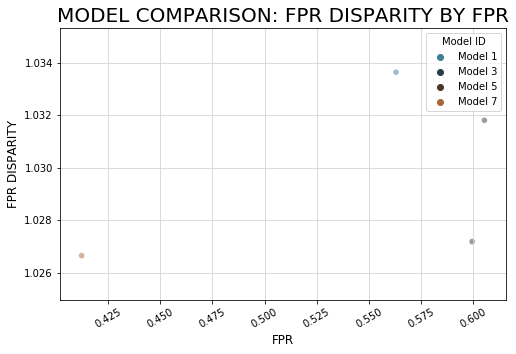

In [6]:
aqp.multimodel_comparison(all_groups, x_metric='fpr', y_metric='fpr_disparity',
                              x_agg_method='max', y_agg_method='max')
plt.show()

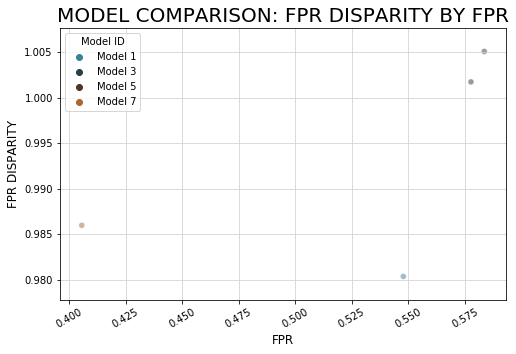

In [7]:
aqp.multimodel_comparison(disparity_table=all_groups, x_metric='fpr', y_metric='fpr_disparity',
                              x_agg_method='mean', y_agg_method='mean')
plt.show()

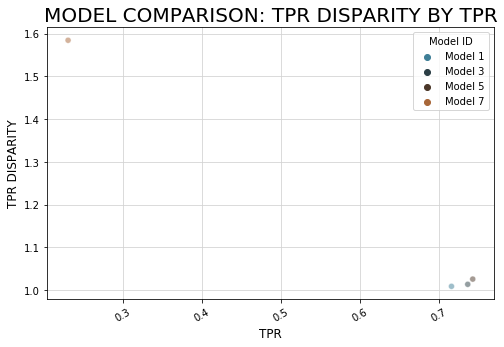

In [8]:
aqp.multimodel_comparison(disparity_table=all_groups, x_metric='tpr', y_metric='tpr_disparity',
                              x_agg_method='mean', y_agg_method='mean')
plt.show()


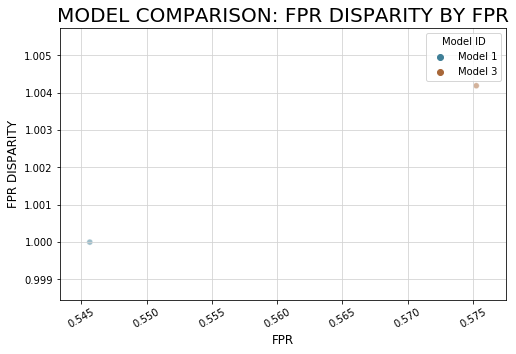

In [9]:
aqp.multimodel_comparison(disparity_table=all_groups, x_metric='fpr', y_metric='fpr_disparity',
                          x_agg_method='median', y_agg_method='median', 
                          selected_models=[1,3])
plt.show()

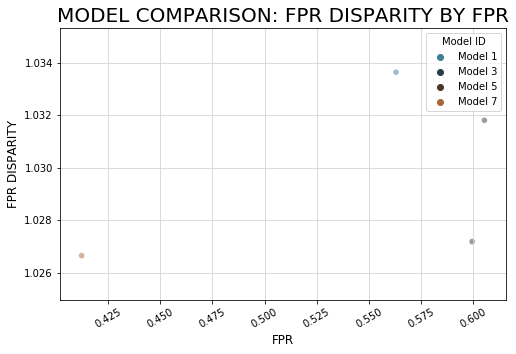

In [10]:
aqp.multimodel_comparison(disparity_table=all_groups, x_metric='fpr', y_metric='fpr_disparity',
                              x_agg_method='max', y_agg_method='max')
plt.show()

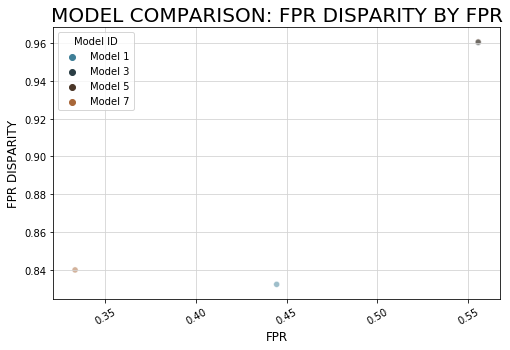

In [11]:
aqp.multimodel_comparison(disparity_table=all_groups, x_metric='fpr', y_metric='fpr_disparity',
                          x_agg_method='min', y_agg_method='min', 
                          x_jitter=10, y_jitter=0)
plt.show()

[Back to Top](#top_cell)

## Create Dataset for Multimodel Crosstab and Bias Method Testing

In [12]:
multi_test = pd.read_csv('/Users/lorenh/Documents/DSaPP/aequitas/examples/data/nyc_sqf_for_aequitas.csv')


In [13]:
multi_test.tail()

,score,label_value,race,sex
11291,1.0,0.0,BLACK,MALE
11292,1.0,0.0,WHITE HISPANIC,MALE
11293,1.0,1.0,BLACK,MALE
11294,1.0,0.0,BLACK,MALE
11295,1.0,0.0,WHITE,MALE


In [14]:
multi_test.shape

(11296, 4)

### Artificially Create More 0.0 Scores

In [15]:
multi_test.groupby('score').count()

,label_value,race,sex
score,,,
1.0,11283,11296,11296


In [16]:
odd = np.arange(1,11296, 2)
odd

array([    1,     3,     5, ..., 11291, 11293, 11295])

In [17]:
multi_test.loc[odd, 'score'] = 0.0

In [18]:
multi_test.groupby('score').count()

,label_value,race,sex
score,,,
0.0,5642,5648,5648
1.0,5641,5648,5648


In [19]:
sevens = np.arange(1,11296, 7)
multi_test.loc[sevens, 'score'] = 1.0

In [20]:
multi_test.groupby('score').count()

,label_value,race,sex
score,,,
0.0,4835,4841,4841
1.0,6448,6455,6455


### Artificially Create More 1.0 Labels

In [21]:
multi_test.groupby('label_value').count()

,score,race,sex
label_value,,,
0.0,10256,10256,10256
1.0,1027,1027,1027


In [22]:
eighteens = np.arange(0,11296, 18)

In [23]:
multi_test.loc[eighteens, 'label_value'] = 1.0

In [24]:
multi_test.groupby('label_value').count()

,score,race,sex
label_value,,,
0.0,9691,9691,9691
1.0,1593,1593,1593


In [25]:
model_3 = multi_test.copy(deep=True)

In [26]:
fifteens = np.arange(0,11296, 15)

In [27]:
model_3.loc[fifteens, 'score'] = 1.0

In [28]:
model_3.groupby('score').count()

,label_value,race,sex
score,,,
0.0,4512,4518,4518
1.0,6772,6778,6778


In [29]:
sixtyseven = np.arange(0,11296, 67)
threes = np.arange(0,11296, 3)

In [30]:
model_5 = model_3.copy(deep=True)
model_7 = multi_test.copy(deep=True)

In [31]:
model_5.loc[sixtyseven, 'score'] = 1.0
model_7.loc[threes, 'score'] = 0.0

In [32]:
model_5.groupby('score').count()

,label_value,race,sex
score,,,
0.0,4445,4451,4451
1.0,6839,6845,6845


In [33]:
model_7.groupby('score').count()

,label_value,race,sex
score,,,
0.0,6984,6993,6993
1.0,4300,4303,4303


In [34]:
multi_test.loc[:,'model_id'] = 1
model_3.loc[:,'model_id'] = 3
model_5.loc[:,'model_id'] = 5
model_7.loc[:,'model_id'] = 7

In [35]:
multi_model_nyc_sqf = pd.concat([multi_test,model_3,model_5,model_7])

In [36]:
multi_model_nyc_sqf.groupby(['model_id', 'race', 'sex']).sum().unstack()

score         label_value       
sex                     FEMALE    MALE      FEMALE   MALE
model_id race                                            
1        AMER IND          1.0     3.0         0.0    0.0
         ASIAN/PAC.ISL    11.0   102.0         2.0   22.0
         BLACK           311.0  3452.0        65.0  831.0
         BLACK HISPANIC   40.0   528.0        11.0  144.0
         WHITE            79.0   466.0        12.0  132.0
         WHITE HISPANIC  122.0  1340.0        23.0  351.0
3        AMER IND          1.0     4.0         0.0    0.0
         ASIAN/PAC.ISL    12.0   113.0         2.0   22.0
         BLACK           329.0  3623.0        65.0  831.0
         BLACK HISPANIC   45.0   554.0        11.0  144.0
         WHITE            84.0   490.0        12.0  132.0
         WHITE HISPANIC  126.0  1397.0        23.0  351.0
5        AMER IND          1.0     4.0         0.0    0.0
         ASIAN/PAC.ISL    12.0   115.0         2.0   22.0
         BLACK           331.0  3656.0        65.0  831.0
         BLACK HISPANIC   45.0   561.0        11.0  144.0
         WHITE            84.0   492.0        12.0  132.0
         WHITE HISPANIC  129.0  1415.0        23.0  351.0
7        AMER IND          1.0     2.0         0.0    0.0
         ASIAN/PAC.ISL     7.0    73.0         2.0   22.0
         BLACK           190.0  2306.0        65.0  831.0
         BLACK HISPANIC   28.0   351.0        11.0  144.0
         WHITE            49.0   303.0        12.0  132.0
         WHITE HISPANIC   86.0   907.0        23.0  351.0

In [37]:
multi_model_nyc_sqf.head()

,score,label_value,race,sex,model_id
0,1.0,1.0,WHITE,FEMALE,1
1,1.0,0.0,BLACK HISPANIC,MALE,1
2,1.0,0.0,BLACK,FEMALE,1
3,0.0,0.0,WHITE HISPANIC,MALE,1
4,1.0,0.0,BLACK,FEMALE,1


In [38]:
multi_model_nyc_sqf.tail()

,score,label_value,race,sex,model_id
11291,0.0,0.0,BLACK,MALE,7
11292,0.0,0.0,WHITE HISPANIC,MALE,7
11293,0.0,1.0,BLACK,MALE,7
11294,1.0,0.0,BLACK,MALE,7
11295,0.0,0.0,WHITE,MALE,7


In [39]:
multi_model_nyc_sqf.to_csv('/Users/lorenh/Documents/DSaPP/aequitas/examples/data/nyc_sqf_for_aequitas_4models.csv')

## Test Multimodel Crosstab and Bias Methods

In [10]:
from aequitas.group import Group
import pandas as pd
from aequitas.preprocessing import preprocess_input_df

In [11]:
multis = pd.read_csv('/Users/lorenh/Documents/DSaPP/aequitas/examples/data/nyc_sqf_for_aequitas_4models.csv')

In [12]:
df, attr_cols = preprocess_input_df(multis[['score', 'label_value', 'race', 'sex', 'model_id']])

In [13]:
df.head()

,score,label_value,race,sex,model_id
0,1.0,1.0,WHITE,FEMALE,1
1,1.0,0.0,BLACK HISPANIC,MALE,1
2,1.0,0.0,BLACK,FEMALE,1
3,0.0,0.0,WHITE HISPANIC,MALE,1
4,1.0,0.0,BLACK,FEMALE,1


In [14]:
g = Group()

### Test Error Handling for more than one model in `get_crosstabs()`

In [6]:
# xtab, _ = g.get_crosstabs(df)

In [15]:
xtab, _ = g.get_multimodel_crosstabs(df)

model_id, score_thresholds 1 {'rank_abs': [6455]}
model_id, score_thresholds 3 {'rank_abs': [6778]}
model_id, score_thresholds 5 {'rank_abs': [6845]}
model_id, score_thresholds 7 {'rank_abs': [4303]}


In [8]:
xtab.head()

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,1,binary 0/1,6455,race,AMER IND,NaN,0.555556,0.000000,1.000000,0.444444,...,0.444444,4,0,5,0,0,9,9,11296,0.000000
1,1,binary 0/1,6455,race,ASIAN/PAC.ISL,0.833333,0.486188,0.043478,0.823009,0.513812,...,0.551220,93,4,88,20,24,181,205,11296,0.117073
2,1,binary 0/1,6455,race,BLACK,0.712054,0.448057,0.092242,0.830189,0.551943,...,0.573628,3124,258,2536,638,896,5660,6560,11296,0.136585
3,1,binary 0/1,6455,race,BLACK HISPANIC,0.709677,0.455090,0.105882,0.801056,0.544910,...,0.572004,455,45,380,110,155,835,993,11296,0.156093
4,1,binary 0/1,6455,race,WHITE,0.722222,0.466019,0.094340,0.807339,0.533981,...,0.562436,440,40,384,104,144,824,969,11296,0.148607


In [16]:
from aequitas.bias import Bias
b = Bias()

In [17]:
b.get_disparity_min_metric(xtab, original_df=df, check_significance=True).style

get_disparity_min_metric()


/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/site-packages/scipy/stats/morestats.py:2352: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,1,binary 0/1,6455,race,AMER IND,nan,0.555556,0,1,0.444444,nan,1,0,4,5,0.000619675,0.444444,4,0,5,0,0,9,9,11296,0,1.24835,BLACK HISPANIC,False,nan,ASIAN/PAC.ISL,False,nan,AMER IND,None,1,AMER IND,False,1.11842,BLACK HISPANIC,False,1,AMER IND,False,1,AMER IND,False,nan,AMER IND,False,1.23992,BLACK,False,nan,BLACK HISPANIC,False
1,1,binary 0/1,6455,race,ASIAN/PAC.ISL,0.833333,0.486188,0.0434783,0.823009,0.513812,0.166667,0.956522,0.176991,113,92,0.0175058,0.55122,93,4,88,20,24,181,205,11296,0.117073,1.0274,BLACK HISPANIC,False,1,ASIAN/PAC.ISL,False,10,AMER IND,False,1.15608,AMER IND,False,1.06979,BLACK HISPANIC,False,28.25,AMER IND,False,1.24024,AMER IND,False,10,AMER IND,False,1.0851,BLACK,False,1.17424,BLACK HISPANIC,False
2,1,binary 0/1,6455,race,BLACK,0.712054,0.448057,0.0922417,0.830189,0.551943,0.287946,0.906686,0.169546,3763,2797,0.582959,0.573628,3124,258,2536,638,896,5660,6560,11296,0.136585,1.03637,BLACK HISPANIC,False,1.72768,ASIAN/PAC.ISL,False,10,AMER IND,False,1.24187,AMER IND,False,1.01406,BLACK HISPANIC,False,940.75,AMER IND,False,1.29066,AMER IND,False,10,AMER IND,False,1,BLACK,False,1.00335,BLACK HISPANIC,False
3,1,binary 0/1,6455,race,BLACK HISPANIC,0.709677,0.45509,0.105882,0.801056,0.54491,0.290323,0.894118,0.193662,568,425,0.0879938,0.572004,455,45,380,110,155,835,993,11296,0.156093,1,BLACK HISPANIC,False,1.74194,ASIAN/PAC.ISL,False,10,AMER IND,False,1.22605,AMER IND,False,1,BLACK HISPANIC,False,142,AMER IND,False,1.28701,AMER IND,False,10,AMER IND,False,1.0157,BLACK,False,1,BLACK HISPANIC,False
4,1,binary 0/1,6455,race,WHITE,0.722222,0.466019,0.0943396,0.807339,0.533981,0.277778,0.90566,0.190826,545,424,0.0844307,0.562436,440,40,384,104,144,824,969,11296,0.148607,1.00784,BLACK HISPANIC,False,1.66667,ASIAN/PAC.ISL,False,10,AMER IND,False,1.20146,AMER IND,False,1.01291,BLACK HISPANIC,False,136.25,AMER IND,False,1.26548,AMER IND,False,10,AMER IND,False,1.04009,BLACK,False,1.01768,BLACK HISPANIC,False
5,1,binary 0/1,6455,race,WHITE HISPANIC,0.716578,0.453254,0.0965392,0.816005,0.546746,0.283422,0.900729,0.183311,1462,1098,0.226491,0.571094,1193,106,989,268,374,2182,2560,11296,0.146094,1.01866,BLACK HISPANIC,False,1.70053,ASIAN/PAC.ISL,False,10,AMER IND,False,1.23018,AMER IND,False,1.00739,BLACK HISPANIC,False,365.5,AMER IND,False,1.28496,AMER IND,False,10,AMER IND,False,1.0116,BLACK,False,1.00972,BLACK HISPANIC,False
6,1,binary 0/1,6455,sex,FEMALE,0.752212,0.436985,0.07,0.847518,0.563015,0.247788,0.9275,0.150709,564,400,0.0873741,0.585062,478,28,371,85,113,849,964,11296,0.11722,1.03348,MALE,False,1,FEMALE,False,1,FEMALE,False,1.03047,MALE,False,1.02693,MALE,False,1,FEMALE,False,1.02612,MALE,False,1,FEMALE,False,1,FEMALE,False,1.05524,MALE,False
7,1,binary 0/1,6455,sex,MALE,0.712838,0.45363,0.0956992,0.820065,0.54637,0.287162,0.903175,0.179087,5891,4441,0.912626,0.57017,4831,425,4011,1055,1480,8842,10332,11296,0.143244,1,MALE,False,1.1589,FEMALE,False,1.36713,FEMALE,False,1,MALE,False,1,MALE,False,10.445,FEMALE,True,1,MALE,True,1.18829,FEMALE,False,1.03809,FEMALE,False,1,MALE,False
8,3,binary 0/1,6778,race,AMER IND,nan,0.444444,0,1,0.555556,nan,1,0,5,4,0.000737681,0.555556,5,0,4,0,0,9,9,11296,0,1.24792,BLACK HISPANIC,False,nan,ASIAN/PAC.ISL,False,nan,AMER IND,None,1,AMER IND,False,1.10986,BLACK HISPANI

In [11]:
b.get_disparity_major_group(xtab, df, check_significance=True).style

get_disparity_major_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,1,binary 0/1,6455,race,AMER IND,nan,0.555556,0,1,0.444444,nan,1,0,4,5,0.000619675,0.444444,4,0,5,0,0,9,9,11296,0,1.20455,BLACK,False,nan,BLACK,False,0,BLACK,False,0.805235,BLACK,False,1.10292,BLACK,False,0.00106298,BLACK,False,0.774796,BLACK,False,0,BLACK,False,1.23992,BLACK,False,nan,BLACK,False
1,1,binary 0/1,6455,race,ASIAN/PAC.ISL,0.833333,0.486188,0.0434783,0.823009,0.513812,0.166667,0.956522,0.176991,113,92,0.0175058,0.55122,93,4,88,20,24,181,205,11296,0.117073,0.991352,BLACK,False,0.578811,BLACK,False,0.471352,BLACK,False,0.930914,BLACK,False,1.05497,BLACK,False,0.0300292,BLACK,False,0.960935,BLACK,False,1.04391,BLACK,False,1.0851,BLACK,False,1.17032,BLACK,False
2,1,binary 0/1,6455,race,BLACK,0.712054,0.448057,0.0922417,0.830189,0.551943,0.287946,0.906686,0.169546,3763,2797,0.582959,0.573628,3124,258,2536,638,896,5660,6560,11296,0.136585,1,BLACK,False,1,BLACK,False,1,BLACK,False,1,BLACK,False,1,BLACK,False,1,BLACK,False,1,BLACK,False,1,BLACK,False,1,BLACK,False,1,BLACK,False
3,1,binary 0/1,6455,race,BLACK HISPANIC,0.709677,0.45509,0.105882,0.801056,0.54491,0.290323,0.894118,0.193662,568,425,0.0879938,0.572004,455,45,380,110,155,835,993,11296,0.156093,0.964909,BLACK,False,1.00825,BLACK,False,1.14788,BLACK,False,0.987257,BLACK,False,0.986138,BLACK,False,0.150943,BLACK,True,0.997169,BLACK,True,1.14224,BLACK,False,1.0157,BLACK,False,0.996663,BLACK,False
4,1,binary 0/1,6455,race,WHITE,0.722222,0.466019,0.0943396,0.807339,0.533981,0.277778,0.90566,0.190826,545,424,0.0844307,0.562436,440,40,384,104,144,824,969,11296,0.148607,0.972477,BLACK,False,0.964686,BLACK,False,1.02274,BLACK,False,0.967455,BLACK,False,0.998869,BLACK,False,0.144831,BLACK,True,0.980488,BLACK,True,1.12551,BLACK,False,1.04009,BLACK,False,1.01428,BLACK,False
5,1,binary 0/1,6455,race,WHITE HISPANIC,0.716578,0.453254,0.0965392,0.816005,0.546746,0.283422,0.900729,0.183311,1462,1098,0.226491,0.571094,1193,106,989,268,374,2182,2560,11296,0.146094,0.982916,BLACK,False,0.984289,BLACK,False,1.04659,BLACK,False,0.990584,BLACK,False,0.99343,BLACK,False,0.38852,BLACK,True,0.995582,BLACK,True,1.08119,BLACK,False,1.0116,BLACK,False,1.00635,BLACK,False
6,1,binary 0/1,6455,sex,FEMALE,0.752212,0.436985,0.07,0.847518,0.563015,0.247788,0.9275,0.150709,564,400,0.0873741,0.585062,478,28,371,85,113,849,964,11296,0.11722,1.03348,MALE,False,0.862884,MALE,False,0.731459,MALE,False,1.03047,MALE,False,1.02693,MALE,False,0.0957393,MALE,True,1.02612,MALE,True,0.841543,MALE,False,0.963306,MALE,False,1.05524,MALE,False
7,1,binary 0/1,6455,sex,MALE,0.712838,0.45363,0.0956992,0.820065,0.54637,0.287162,0.903175,0.179087,5891,4441,0.912626,0.57017,4831,425,4011,1055,1480,8842,10332,11296,0.143244,1,MALE,False,1,MALE,False,1,MALE,False,1,MALE,False,1,MALE,False,1,MALE,False,1,MALE,False,1,MALE,False,1,MALE,False,1,MALE,False
8,3,binary 0/1,6778,race,AMER IND,nan,0.444444,0,1,0.555556,nan,1,0,5,4,0.000737681,0.555556,5,0,4,0,0,9,9,11296,0,1.19939,BLACK,False,nan,BLACK,False,0,BLACK,False,0.954308,BLACK,False,1.10275,BLACK,False,0.00126518,BLACK,False,0.922177,BLACK,False,0,BLACK,False,1.06366,BLACK,False,nan,BLACK,False
9,3,binary 0/1,6778,race,ASIAN/PAC.ISL,0.833333,0.41989,0.05,0.84,0.58011,0.166667,0.95,0.16,125,80,0.018442,0.609756,105,4,76,20,24,181,205,11296,0.117073,1.00749,BLAC

In [18]:
bdf = b.get_disparity_predefined_groups(xtab, df, {"race": "WHITE", "sex": "FEMALE"}, check_significance=True,
                                 selected_significance=['for', 'fpr', 'npv'])
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,fdr_disparity,fdr_ref_group_value,fnr_disparity,fnr_ref_group_value,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,pprev_disparity,pprev_ref_group_value,precision_disparity,precision_ref_group_value,tnr_disparity,tnr_ref_group_value,tpr_disparity,tpr_ref_group_value
0,1,binary 0/1,6455,race,AMER IND,nan,0.555556,0,1,0.444444,nan,1,0,4,5,0.000619675,0.444444,4,0,5,0,0,9,9,11296,0,1.23864,WHITE,nan,WHITE,0,WHITE,False,0.832323,WHITE,False,1.10417,WHITE,False,0.00733945,WHITE,0.790214,WHITE,0,WHITE,1.19213,WHITE,nan,WHITE
1,1,binary 0/1,6455,race,ASIAN/PAC.ISL,0.833333,0.486188,0.0434783,0.823009,0.513812,0.166667,0.956522,0.176991,113,92,0.0175058,0.55122,93,4,88,20,24,181,205,11296,0.117073,1.01941,WHITE,0.6,WHITE,0.46087,WHITE,False,0.96223,WHITE,False,1.05616,WHITE,False,0.207339,WHITE,0.980058,WHITE,0.927502,WHITE,1.04328,WHITE,1.15385,WHITE
2,1,binary 0/1,6455,race,BLACK,0.712054,0.448057,0.0922417,0.830189,0.551943,0.287946,0.906686,0.169546,3763,2797,0.582959,0.573628,3124,258,2536,638,896,5660,6560,11296,0.136585,1.0283,WHITE,1.03661,WHITE,0.977762,WHITE,False,1.03364,WHITE,False,1.00113,WHITE,False,6.90459,WHITE,1.0199,WHITE,0.888484,WHITE,0.961455,WHITE,0.98592,WHITE
3,1,binary 0/1,6455,race,BLACK HISPANIC,0.709677,0.45509,0.105882,0.801056,0.54491,0.290323,0.894118,0.193662,568,425,0.0879938,0.572004,455,45,380,110,155,835,993,11296,0.156093,0.992218,WHITE,1.04516,WHITE,1.12235,WHITE,False,1.02047,WHITE,False,0.987255,WHITE,False,1.0422,WHITE,1.01701,WHITE,1.01486,WHITE,0.976547,WHITE,0.98263,WHITE
4,1,binary 0/1,6455,race,WHITE,0.722222,0.466019,0.0943396,0.807339,0.533981,0.277778,0.90566,0.190826,545,424,0.0844307,0.562436,440,40,384,104,144,824,969,11296,0.148607,1,WHITE,1,WHITE,1,WHITE,False,1,WHITE,False,1,WHITE,False,1,WHITE,1,WHITE,1,WHITE,1,WHITE,1,WHITE
5,1,binary 0/1,6455,race,WHITE HISPANIC,0.716578,0.453254,0.0965392,0.816005,0.546746,0.283422,0.900729,0.183311,1462,1098,0.226491,0.571094,1193,106,989,268,374,2182,2560,11296,0.146094,1.01073,WHITE,1.02032,WHITE,1.02332,WHITE,False,1.02391,WHITE,False,0.994554,WHITE,False,2.68257,WHITE,1.01539,WHITE,0.960618,WHITE,0.972607,WHITE,0.992184,WHITE
6,1,binary 0/1,6455,sex,FEMALE,0.752212,0.436985,0.07,0.847518,0.563015,0.247788,0.9275,0.150709,564,400,0.0873741,0.585062,478,28,371,85,113,849,964,11296,0.11722,1,FEMALE,1,FEMALE,1,FEMALE,False,1,FEMALE,False,1,FEMALE,False,1,FEMALE,1,FEMALE,1,FEMALE,1,FEMALE,1,FEMALE
7,1,binary 0/1,6455,sex,MALE,0.712838,0.45363,0.0956992,0.820065,0.54637,0.287162,0.903175,0.179087,5891,4441,0.912626,0.57017,4831,425,4011,1055,1480,8842,10332,11296,0.143244,0.967607,FEMALE,1.1589,FEMALE,1.36713,FEMALE,False,0.970435,FEMALE,False,0.973774,FEMALE,False,10.445,FEMALE,0.974546,FEMALE,1.18829,FEMALE,1.03809,FEMALE,0.947655,FEMALE
8,3,binary 0/1,6778,race,AMER IND,nan,0.444444,0,1,0.555556,nan,1,0,5,4,0.000737681,0.555556,5,0,4,0,0,9,9,11296,0,1.22912,WHITE,nan,WHITE,0,WHITE,False,0.980252,WHITE,False,1.10644,WHITE,False,0.0087108,WHITE,0.937863,WHITE,0,WHITE,1.02583,WHITE,nan,WHITE
9,3,binary 0/1,6778,race,ASIAN/PAC.ISL,0.833333,0.41989,0.05,0.84,0.58011,0.166667,0.95,0.16,125,80,0.018442,0.609756,105,4,76,20,24,181,205,11296,0.117073,1.03246,WHITE,0.631579,WHITE,0.519737,WHITE,False,1.02358,WHITE,False,1.05112,WHITE,False,0.21777,WHITE,1.02936,WHITE,0.866415,WHITE,0.969157,WHITE,1.13208,WHITE


In [19]:
from aequitas.fairness import Fairness
f = Fairness()

In [20]:
fdf = f.get_group_value_fairness(bdf)
fdf.style

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,fdr_disparity,fdr_ref_group_value,fnr_disparity,fnr_ref_group_value,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,pprev_disparity,pprev_ref_group_value,precision_disparity,precision_ref_group_value,tnr_disparity,tnr_ref_group_value,tpr_disparity,tpr_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,6455,race,AMER IND,nan,0.555556,0,1,0.444444,nan,1,0,4,5,0.000619675,0.444444,4,0,5,0,0,9,9,11296,0,1.23864,WHITE,nan,WHITE,0,WHITE,False,0.832323,WHITE,False,1.10417,WHITE,False,0.00733945,WHITE,0.790214,WHITE,0,WHITE,1.19213,WHITE,nan,WHITE,False,False,True,True,False,nan,nan,True,True,False,True,False,False,False,False
1,1,binary 0/1,6455,race,ASIAN/PAC.ISL,0.833333,0.486188,0.0434783,0.823009,0.513812,0.166667,0.956522,0.176991,113,92,0.0175058,0.55122,93,4,88,20,24,181,205,11296,0.117073,1.01941,WHITE,0.6,WHITE,0.46087,WHITE,False,0.96223,WHITE,False,1.05616,WHITE,False,0.207339,WHITE,0.980058,WHITE,0.927502,WHITE,1.04328,WHITE,1.15385,WHITE,False,True,True,True,False,False,True,True,True,True,True,False,True,False,False
2,1,binary 0/1,6455,race,BLACK,0.712054,0.448057,0.0922417,0.830189,0.551943,0.287946,0.906686,0.169546,3763,2797,0.582959,0.573628,3124,258,2536,638,896,5660,6560,11296,0.136585,1.0283,WHITE,1.03661,WHITE,0.977762,WHITE,False,1.03364,WHITE,False,1.00113,WHITE,False,6.90459,WHITE,1.0199,WHITE,0.888484,WHITE,0.961455,WHITE,0.98592,WHITE,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True
3,1,binary 0/1,6455,race,BLACK HISPANIC,0.709677,0.45509,0.105882,0.801056,0.54491,0.290323,0.894118,0.193662,568,425,0.0879938,0.572004,455,45,380,110,155,835,993,11296,0.156093,0.992218,WHITE,1.04516,WHITE,1.12235,WHITE,False,1.02047,WHITE,False,0.987255,WHITE,False,1.0422,WHITE,1.01701,WHITE,1.01486,WHITE,0.976547,WHITE,0.98263,WHITE,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,1,binary 0/1,6455,race,WHITE,0.722222,0.466019,0.0943396,0.807339,0.533981,0.277778,0.90566,0.190826,545,424,0.0844307,0.562436,440,40,384,104,144,824,969,11296,0.148607,1,WHITE,1,WHITE,1,WHITE,False,1,WHITE,False,1,WHITE,False,1,WHITE,1,WHITE,1,WHITE,1,WHITE,1,WHITE,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,1,binary 0/1,6455,race,WHITE HISPANIC,0.716578,0.453254,0.0965392,0.816005,0.546746,0.283422,0.900729,0.183311,1462,1098,0.226491,0.571094,1193,106,989,268,374,2182,2560,11296,0.146094,1.01073,WHITE,1.02032,WHITE,1.02332,WHITE,False,1.02391,WHITE,False,0.994554,WHITE,False,2.68257,WHITE,1.01539,WHITE,0.960618,WHITE,0.972607,WHITE,0.992184,WHITE,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True
6,1,binary 0/1,6455,sex,FEMALE,0.752212,0.436985,0.07,0.847518,0.563015,0.247788,0.9275,0.150709,564,400,0.0873741,0.585062,478,28,371,85,113,849,964,11296,0.11722,1,FEMALE,1,FEMALE,1,FEMALE,False,1,FEMALE,False,1,FEMALE,False,1,FEMALE,1,FEMALE,1,FEMALE,1,FEMALE,1,FEMALE,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,1,binary 0/1,6455,sex,MALE,0.712838,0.45363,0.0956992,0.820065,0.54637,0.287162,0.903175,0.179087,5891,4441,0.912626,0.57017,4831,425,4011,1055,1480,8842,10332,11296,0.143244,0.967607,FEMALE,1.1589,FEMALE,1.36713,FEMALE,False,0.970435,FEMALE,False,0.973774,FEMALE,False,10.445,FEMALE,0.974546,FEMALE,1.18829,FEMALE,1.03809,FEMALE,0.947655,FEMALE,False,True,True,True,False,True,True,True,True,True,True,False,True,False,False
8,3,binary 0/1,6778,race,AMER IND,nan,0.444444,0,1,0.555556,nan,1,0,

In [21]:
fdf.to_pickle('~/Documents/DSaPP/multimodel_fdf.pkl')

In [29]:
fdf.columns

Index(['model_id', 'score_threshold', 'k', 'attribute_name', 'attribute_value',
       'tpr', 'tnr', 'for', 'fdr', 'fpr', 'fnr', 'npv', 'precision', 'pp',
       'pn', 'ppr', 'pprev', 'fp', 'fn', 'tn', 'tp', 'group_label_pos',
       'group_label_neg', 'group_size', 'total_entities', 'prev',
       'fdr_disparity', 'fdr_ref_group_value', 'fnr_disparity',
       'fnr_ref_group_value', 'for_disparity', 'for_ref_group_value',
       'for_significance', 'fpr_disparity', 'fpr_ref_group_value',
       'fpr_significance', 'npv_disparity', 'npv_ref_group_value',
       'npv_significance', 'ppr_disparity', 'ppr_ref_group_value',
       'pprev_disparity', 'pprev_ref_group_value', 'precision_disparity',
       'precision_ref_group_value', 'tnr_disparity', 'tnr_ref_group_value',
       'tpr_disparity', 'tpr_ref_group_value', 'Statistical Parity',
       'Impact Parity', 'FDR Parity', 'FPR Parity', 'FOR Parity', 'FNR Parity',
       'TPR Parity', 'TNR Parity', 'NPV Parity', 'Precision Parity',
    

In [30]:
f.get_group_attribute_fairness(bdf)

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,race,False,False,True,True,False,False,True,True,True,False,True,False,False,False,False
1,1,binary 0/1,sex,False,True,True,True,False,True,True,True,True,True,True,False,True,False,False
2,3,binary 0/1,race,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False
3,3,binary 0/1,sex,False,True,True,True,False,True,True,True,True,True,True,False,True,False,False
4,5,binary 0/1,race,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False
5,5,binary 0/1,sex,False,True,True,True,False,True,True,True,True,True,True,False,True,False,False
6,7,binary 0/1,race,False,True,True,True,False,False,False,True,True,False,True,False,False,False,False
7,7,binary 0/1,sex,False,True,True,True,True,True,False,True,True,False,True,True,False,False,True


In [31]:
f.list_parities(fdf)

['Equalized Odds',
 'FDR Parity',
 'Statistical Parity',
 'Impact Parity',
 'FPR Parity',
 'FOR Parity',
 'TNR Parity',
 'FNR Parity',
 'Supervised Fairness',
 'TypeI Parity',
 'TPR Parity',
 'Unsupervised Fairness',
 'Precision Parity',
 'NPV Parity',
 'TypeII Parity']

In [32]:
f.get_overall_fairness(bdf)

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

## Multimodel Plotting Metrics

In [33]:
from aequitas.plotting import Plot
p = Plot()

### Test Error Handling on Multimodel Plotting

In [34]:
# fpr_group_metric = p.plot_group_metric(xtab, 'fpr')

### Multimodel Plotting

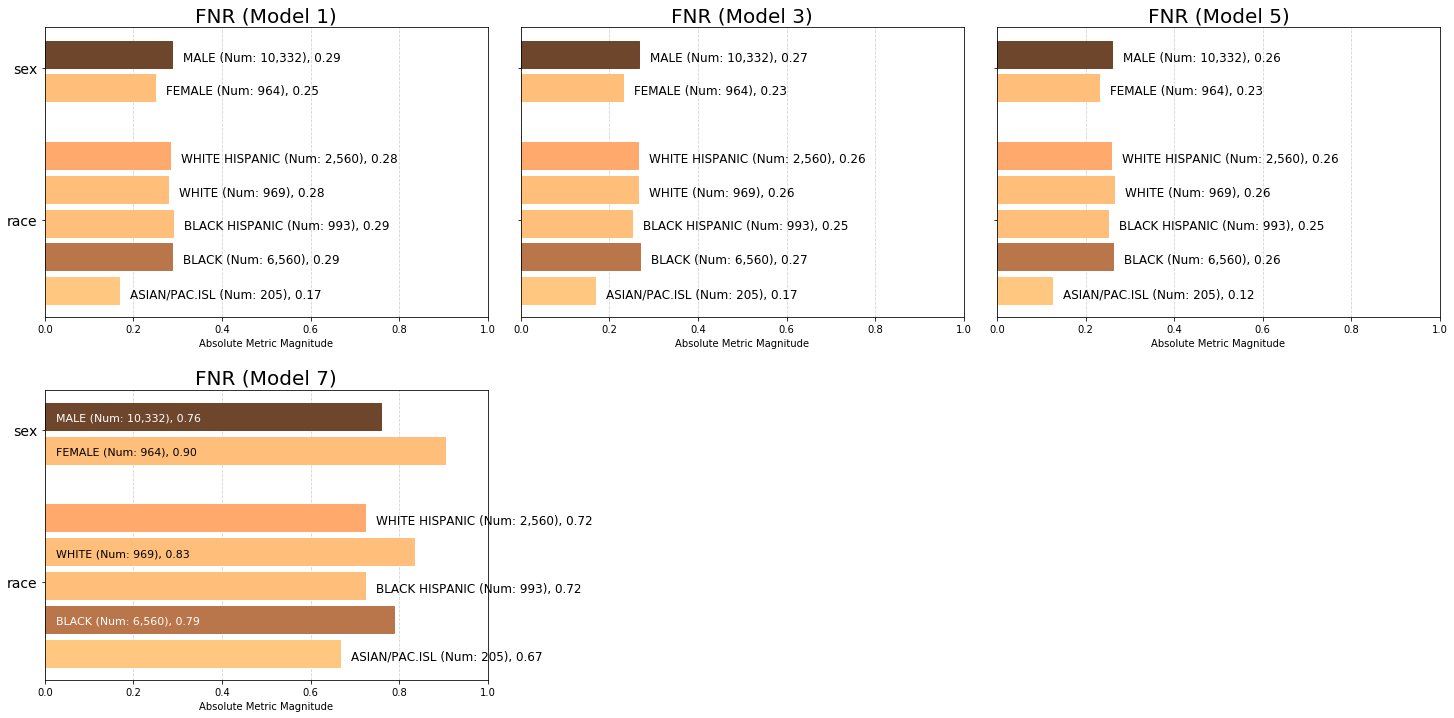

In [35]:
fpr_group_metric = p.multimodel_plot_group_metric(xtab, "fnr")

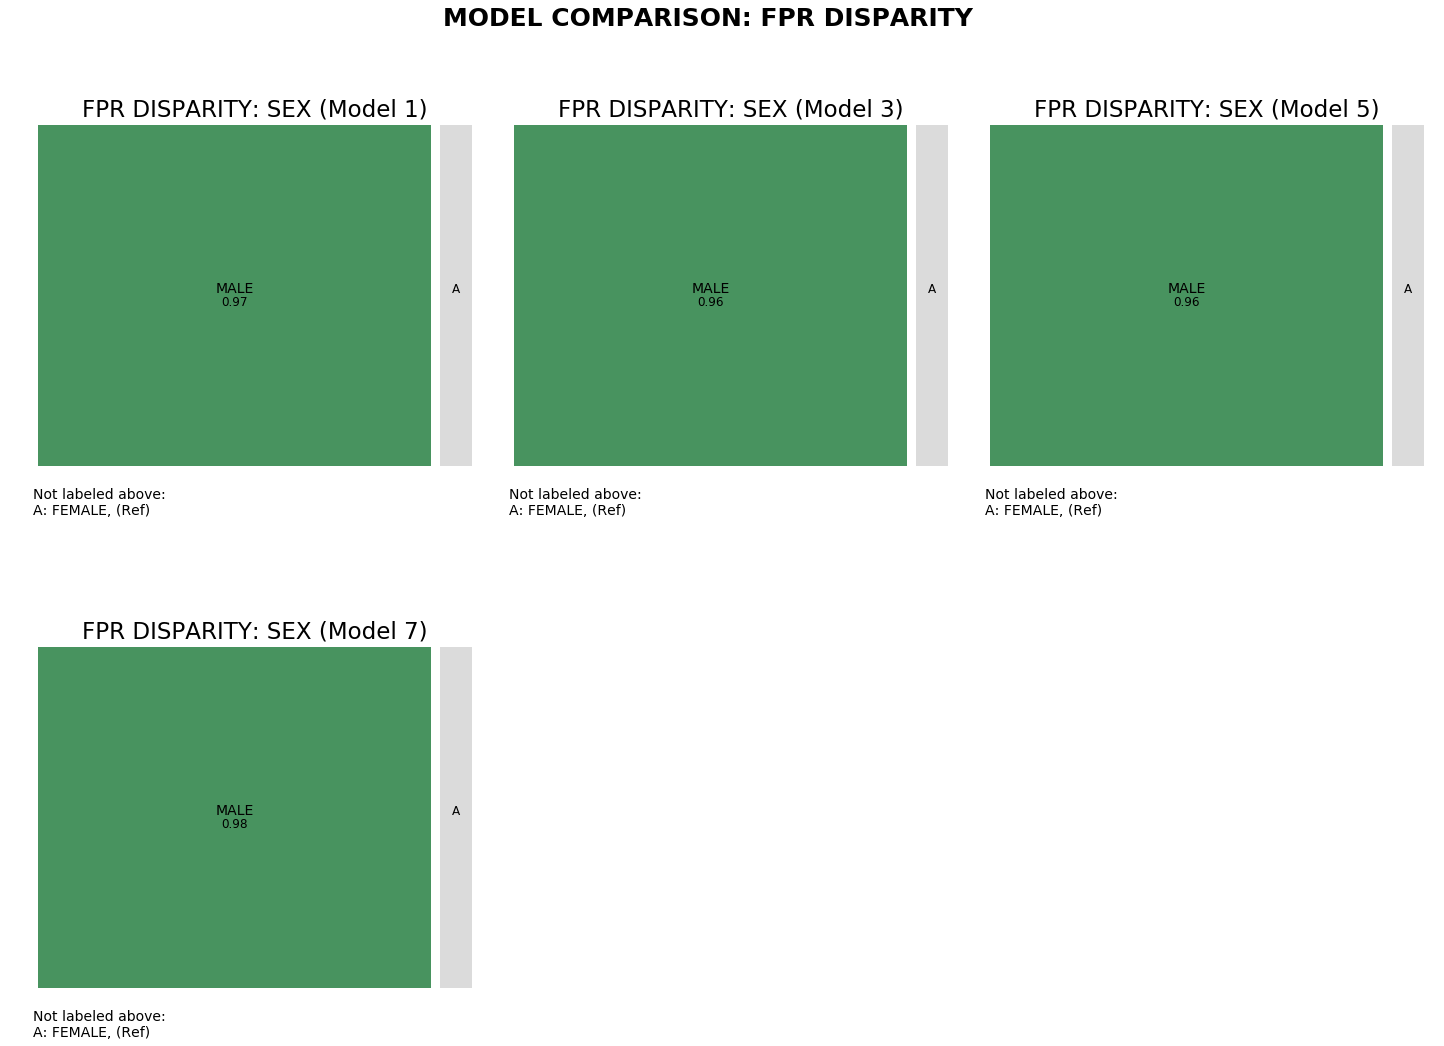

In [36]:
fpr_disp = p.multimodel_plot_disparity(bdf, "fpr", "sex")

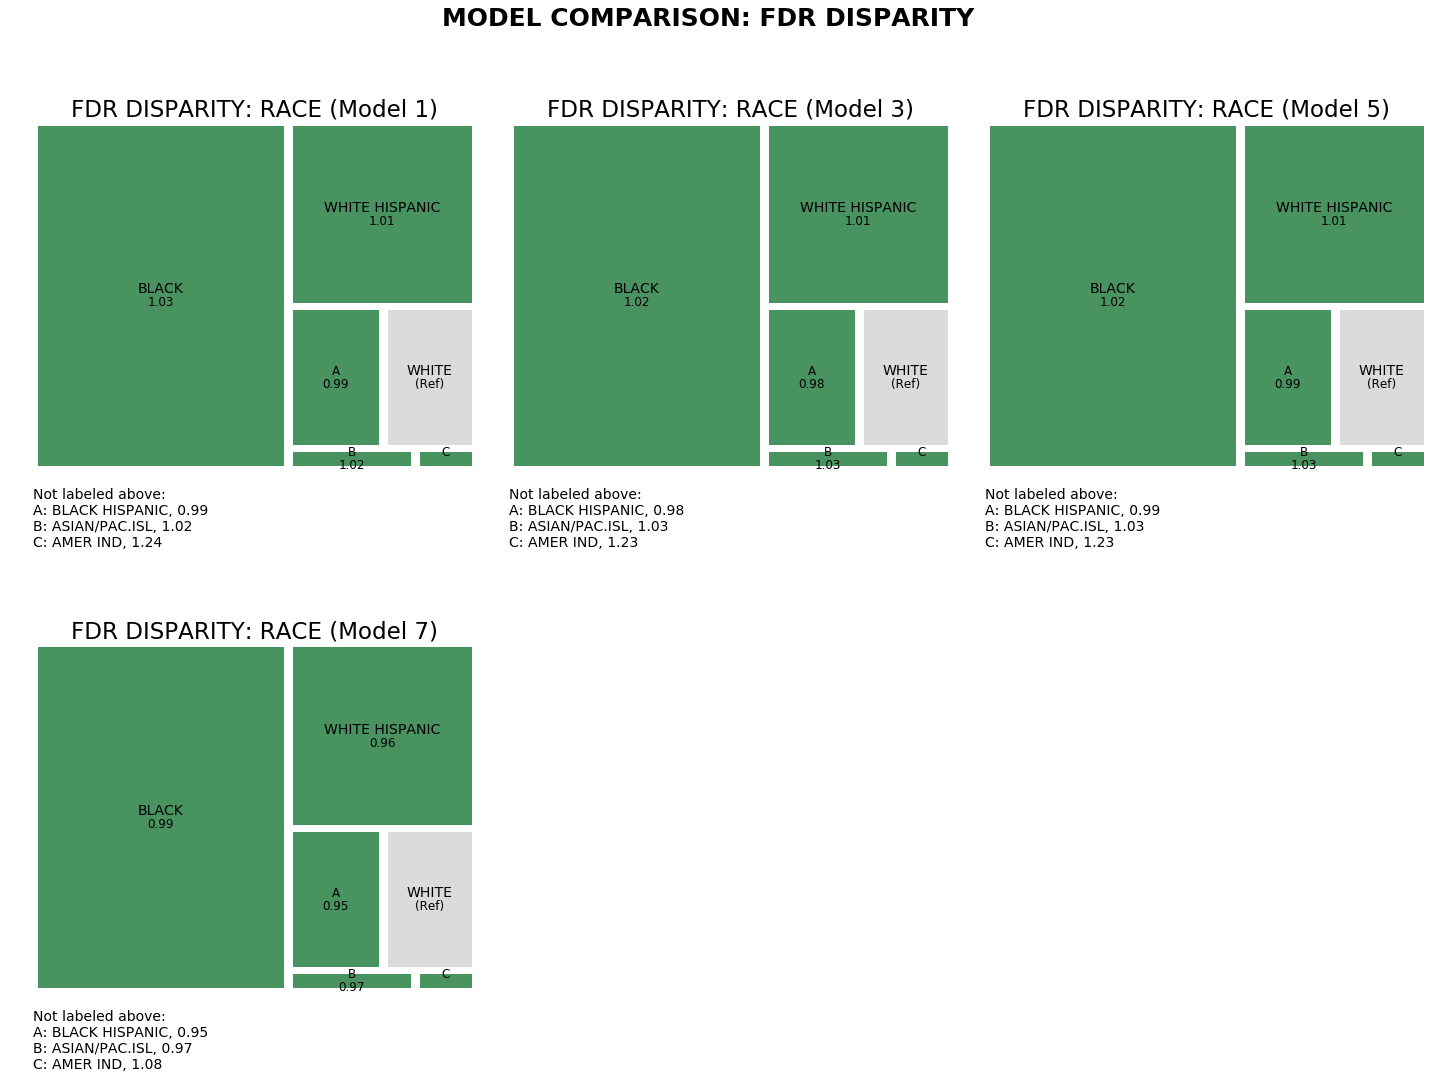

In [37]:
fpr_disp = p.multimodel_plot_disparity(bdf, "fdr", "race")

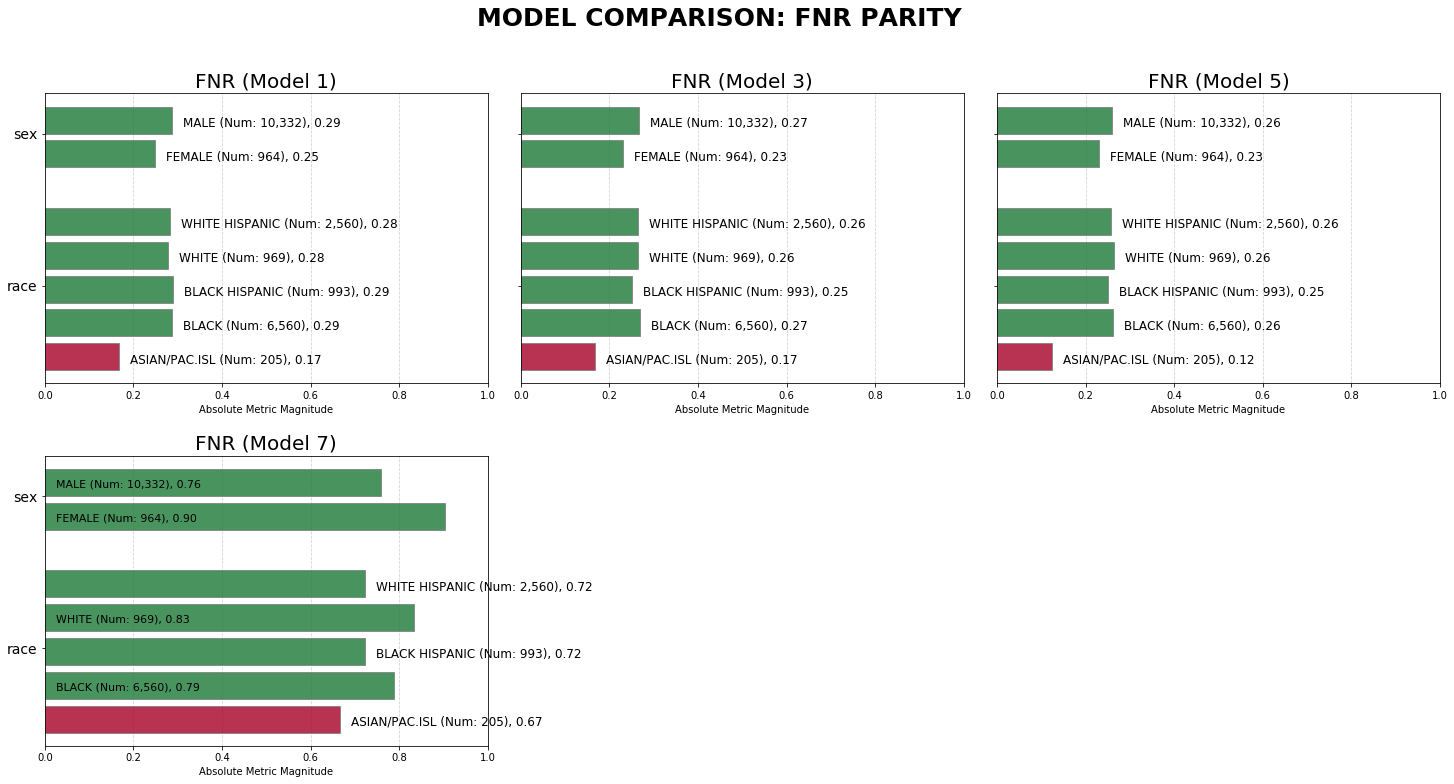

In [38]:
fdr_parity = p.multimodel_plot_fairness_group(fdf, "fnr")

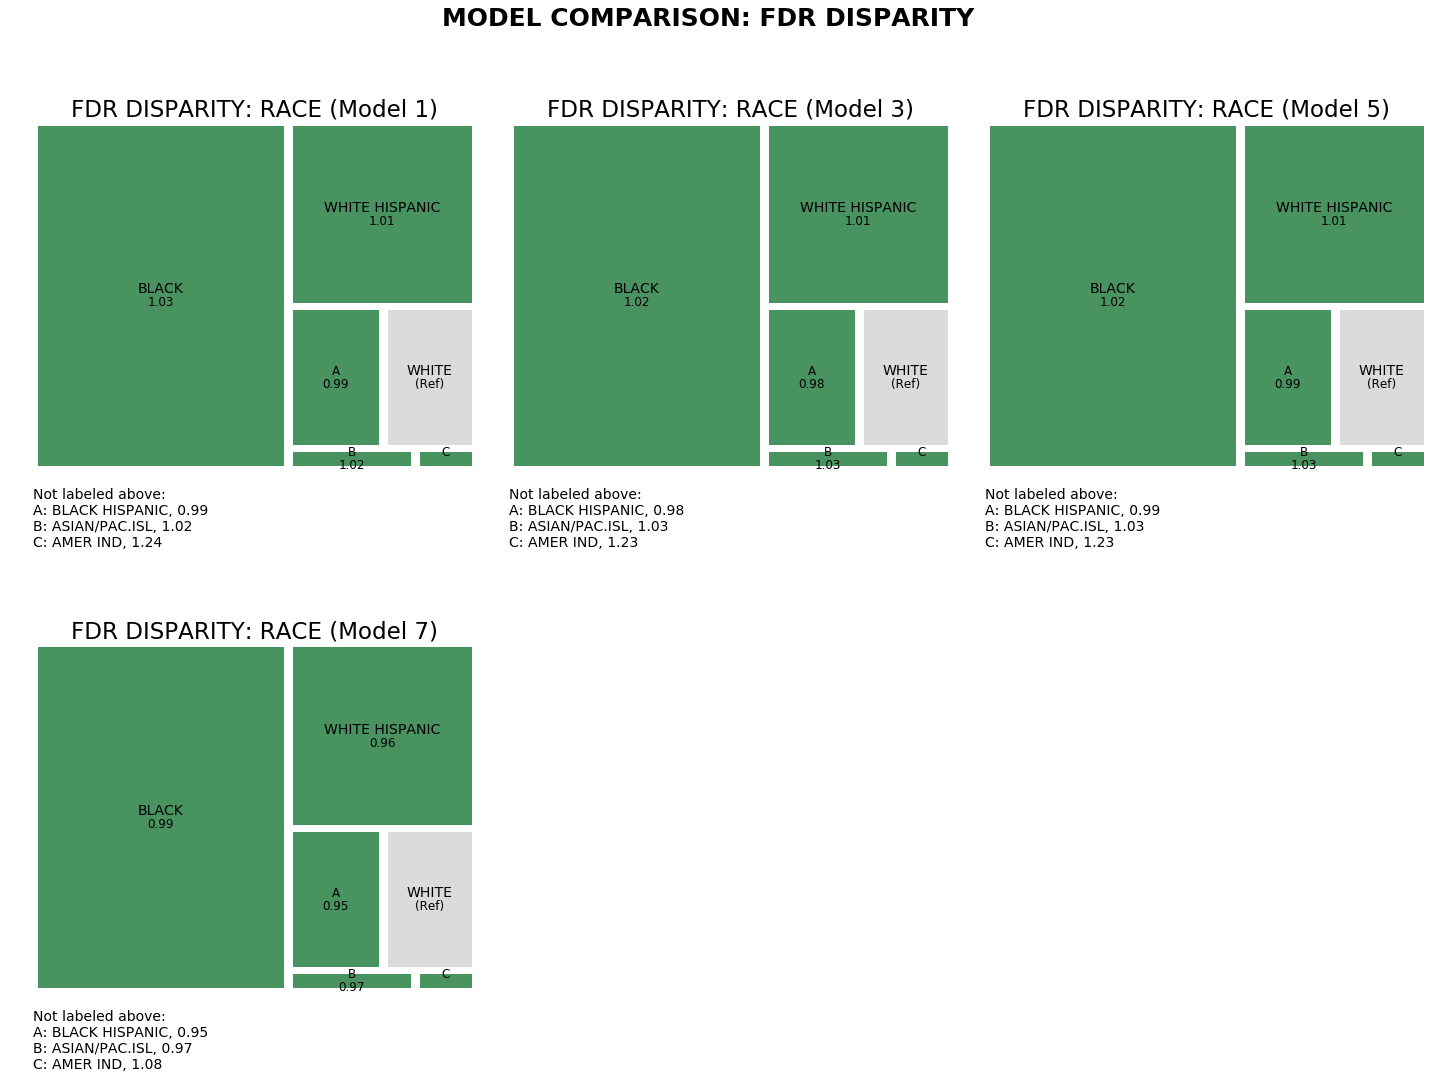

In [39]:
fnr_fairness = p.multimodel_plot_fairness_disparity(fdf, "fdr", attribute_name = "race")

In [40]:
from aequitas.plotting import Plot
import pandas as pd
p = Plot()
fdf = pd.read_pickle('~/Documents/DSaPP/multimodel_fdf.pkl')

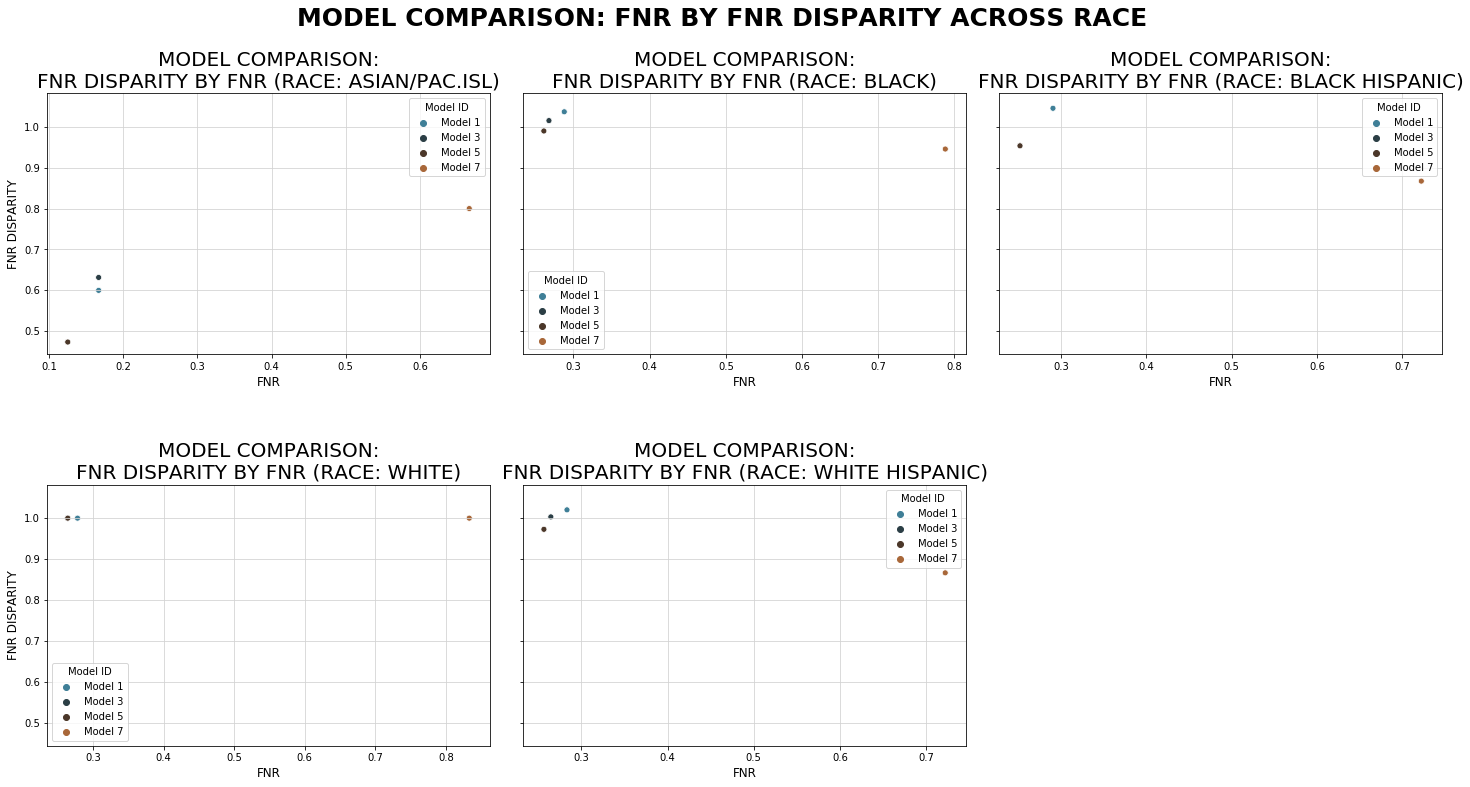

In [41]:
race_model_compare = p.multimodel_attribute_comparison(fdf, attribute="race", x_metric="fnr", 
                                                       y_metric="fnr_disparity")

### Test Error Handling

In [42]:
# race_model_compare = p.multimodel_attribute_comparison(fdf.loc[fdf['model_id']==1], attribute="race", x_metric="fnr", 
#                                                        y_metric="fnr_disparity")

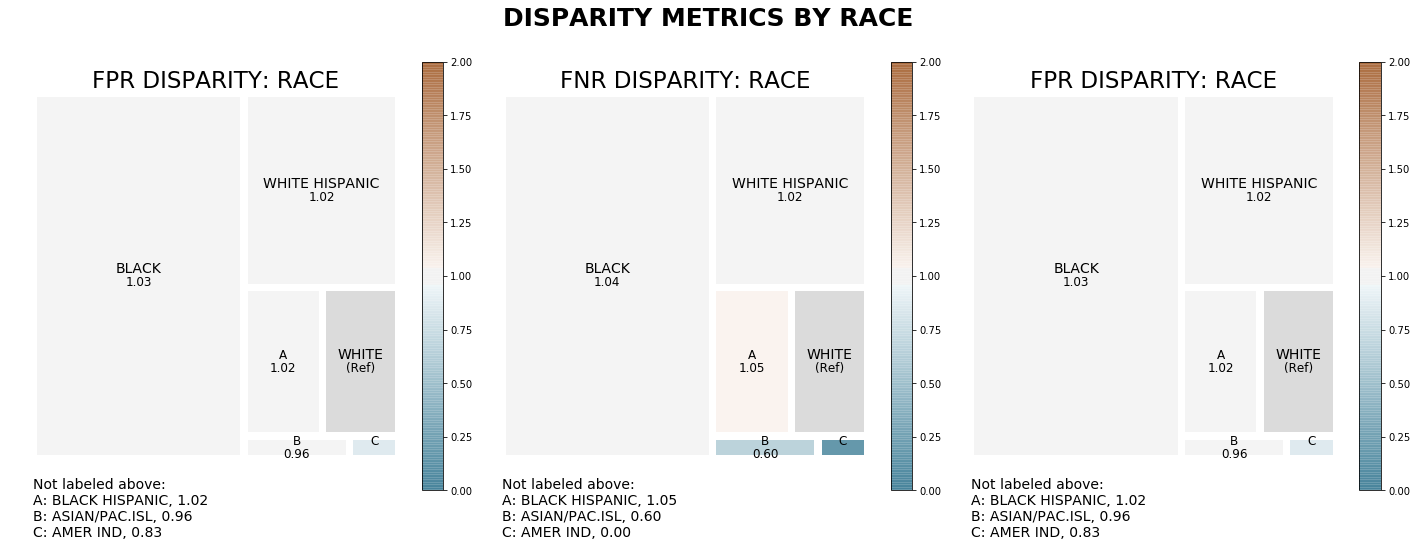

In [43]:
race_compare = p.plot_disparity_all(fdf.loc[fdf['model_id']==1], metrics=["fpr", "fnr", "fpr"], 
                                    attributes=["race"])


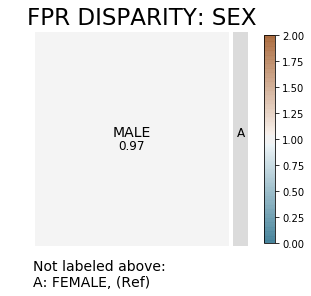

In [44]:
race_compare = p.plot_disparity(fdf.loc[fdf['model_id']==1], "fpr", attribute_name="sex")

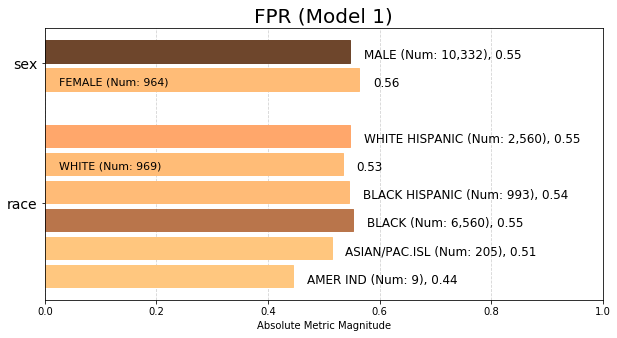

In [45]:
race_compare = p.plot_group_metric(fdf.loc[fdf['model_id']==1], "fpr")